<a href="https://colab.research.google.com/github/Janvi-Gupta/OIBSIP_Task4/blob/main/OIBSIP_T4(Email_Spam_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Data Science Intern @ Oasis Infobyte**
---


# **Task #1 - Email Spam Detection with ML**

### **Problem Statement:**
- We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams, or most dangerously, phishing content.

- In this Project, use Python to build an email spam detector. Then, use machine learning to train the spam detector to recognize and classify emails into spam and non-spam.

### **Dataset:**
* #### https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

### **Github:**
* #### https://github.com/Janvi-Gupta/OIBSIP_Task4/blob/main/Oasis_T4(Email_Spam_Detection).ipynb

### **Youtube:**

## `Author: Janvi Gupta`

## **Import Libraries**

In [76]:
# For Data analysis, manipulation, and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For converting the text into vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# For Training/testing, selecting a model, and Evaluating a model performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report

In [77]:
# Read the spam dataset and display first 5 rows
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [78]:
# last 5 rows
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


## **Explore Data**

In [79]:
# Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [80]:
# It gives the Dimension or The number of Rows and columns
df.shape

(5572, 5)

In [81]:
# It shows only columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [83]:
# Descriptive statistics summary of a given dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [84]:
# Check the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## **Data Cleaning**

In [85]:
#Remove this column
rem_col = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(rem_col, axis=1)

In [86]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [88]:
#Rename the column name for a better understanding
rename_col = {"v1":"Category","v2":"Text"}
df = df.rename(rename_col, axis=1)

In [89]:
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [92]:
# use LabelEncoder on the category column to convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Category"] = encoder.fit_transform(df["Category"])

# Or another way is to change manually
# df["Category"][df["Category"] == "spam"] = 1
# df["Category"][df["Category"] == "ham"] = 0

df.head()
# 0 - ham
# 1 - spam

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
#check fir duplicates
df.duplicated().sum()

403

In [94]:
#Delete duplicates
df = df.drop_duplicates(keep="first")

In [16]:
df.duplicated().sum()

0

In [95]:
#After removing Duplicates
df.shape

(5169, 2)

## **Data Visualization**

In [97]:
#Count the Category values
category = df["Category"].value_counts()
print(category)

0    4516
1     653
Name: Category, dtype: int64


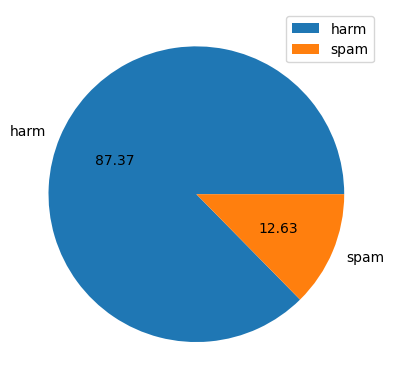

In [98]:
#plot the pie chart of category values
plt.pie(category, labels=['harm','spam'], autopct="%0.2f")
plt.legend()
plt.show()

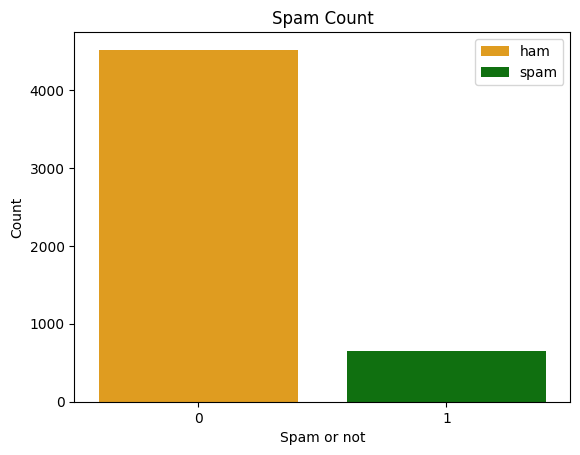

In [101]:
# countplot for Category
c = ['orange','green']
l = ['ham','spam']
sns.countplot(data=df, x='Category', palette=c, label=l)
plt.xlabel("Spam or not")
plt.ylabel("Count")
plt.title("Spam Count")
plt.legend()
plt.show()

## **Spliting the Data into Train and Test**

In [22]:
X = df["Text"]
y = df["Category"]

In [ ]:
print(X,"\n\n",y)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
print("X",X.shape, "X_train",X_train.shape, "X_test",X_test.shape,"\n")
print("y",y.shape, "y_train", y_train.shape, "y_test",y_test.shape)

## **Extract the Features**

#### **TfidfVectorizer is a type of feature extraction**
- It is a very popular technique for transforming text data into a numerical representation that can be used by machine learning algorithms.
- TfidfVectorizer works by first calculating the term frequency (TF) and inverse document frequency (IDF) for each word in the text corpus. TF measures the number of times a word appears in a document, while IDF measures how important a word is to the corpus as a whole.
- The TF-IDF score for a word is calculated by multiplying the TF and IDF scores.

In [ ]:
# Stop_words are a set of commonly used words in a language that are often removed from text data before ml algorithms are applied.
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_feature = feature_extraction.fit_transform(X_train)
X_test_feature = feature_extraction.transform(X_test)

print(X_train,X_train_feature)

In [ ]:
#Test data in Vectorized form
print(X_test,X_test_feature)

## **Train a Model**

In [ ]:
# RandomForest Classifier
model = RandomForestClassifier()
model.fit(X_train_feature,y_train)

## **Model Evaluation**

In [ ]:
#Predict Test data and check the performance of model using accuracy score, MAE and MSE
y_test_pred = model.predict(X_test_feature)
print("Accuracy:",accuracy_score(y_test,y_test_pred))

print("\nmean_absolute_error:",mean_absolute_error(y_test,y_test_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("r2_score:",r2_score(y_test,y_test_pred))
print("\nclassification_report:\n",classification_report(y_test,y_test_pred))


## **Email Checking**

In [119]:
#function for checking whether an email is spam?

def spamchecking(mail):
  input = feature_extraction.transform(mail)
  prediction = model.predict(input)

  if prediction == 1:
    return "Email is Spam"
  else:
    return "Email is not Spam"


In [ ]:
mail1 = ["""These brand new domain extensions were recently approved by ICANN and have the same rights as the original .COM and .NET domain names.
The biggest benefit is of-course that the .BIZ and .INFO domain names are currently more available.
i.e. it will be much easier to register an attractive and easy-to-remember domain name for the same price.  Visit: http://www.affordable-domains.com today for more info."""]

print(spamchecking(mail1))

In [ ]:
mail2 = ["""The Future of Remote Work in Tech Sector 🌐
Welcome to our in-depth exploration of the future of remote work in the tech sector! In this comprehensive newsletter by Scaler Tech,
we'll take a deep dive into the dynamic world of remote work, the transformative tech tools that drive it, and what lies ahead on the horizon!
"""]

print(spamchecking(mail2))